In [3]:
!pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 660.6 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.6 MB 919.0 kB/s eta 0:00:13
   ---------------------------------------- 0.1/11.6 MB 819.2 kB/s eta 0:00:15
    --------------------------------------- 0.2/11.6 MB 893.0 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.6 MB 831.5 kB/s eta 0:00:14
    --------------------------------------- 0.3/11.6 MB 874.6 kB/s eta 0:00:13
   - -------------------------------------- 0.3/11.6 MB 905.4 kB/s eta 0:00:13
   - -------------------------------------- 0.3/11.6 MB 873.8 kB/s eta 0:00:13
   - -------------------------------------- 0.4/11.6 MB 897.8 kB/s eta 0:00:13
   - -------------------------------------- 0.4/11.6 MB 949.4 kB/s eta 0:00:12
   - -------------------------------------- 0.5/11.6 MB 962.6 kB/s eta 0:00:12
   - -------------------------------------- 0.5/11.6 MB 929.3

In [9]:
import pandas as pd

import sqlite3

# # Connect to the SQLite database
conn = sqlite3.connect('database.db')
query = """
    SELECT 
        property.pr_id,
        type_estate.name AS type_estate,
        district.name AS district,
        property.posted_date,
        property.area,
        property.price,
        legal_document.name AS legal_document,
        interior.name AS interior,
        property.num_bedrooms,
        property.num_bathrooms,
        property.num_floors,
        property.entrance,
        property.frontage,
        property.price_per_sqm
    FROM 
        property
    JOIN 
        type_estate ON property.type_estate = type_estate.id
    JOIN 
        district ON property.district = district.id
    JOIN 
        legal_document ON property.legal_document = legal_document.id
    JOIN 
        interior ON property.interior = interior.id;
"""
data = pd.read_sql_query(query, conn)

print(data)
# Close the database connection
conn.close()

          pr_id           type_estate   district posted_date   area  \
0      13411848  Nhà biệt thự liền kề     Tây Hồ  2024-05-11  167.0   
1      14600637  Nhà biệt thự liền kề    Hà Đông  2024-05-13  200.0   
2      15114948  Nhà biệt thự liền kề   Hoài Đức  2024-05-14  210.0   
3      15251328  Nhà biệt thự liền kề    Hà Đông  2024-05-11   95.0   
4      18480219             Nhà riêng     Tây Hồ  2024-05-09   60.0   
...         ...                   ...        ...         ...    ...   
14605  39860993             Nhà riêng    Hà Đông  2024-05-15   42.0   
14606  39860995             Nhà riêng    Đống Đa  2024-05-15   79.0   
14607  39861005           Nhà mặt phố  Long Biên  2024-05-15   91.0   
14608  39861018  Nhà biệt thự liền kề   Hoài Đức  2024-05-15   80.0   
14609  39861046           Nhà mặt phố   Cầu Giấy  2024-05-15  100.0   

              price  legal_document interior  num_bedrooms  num_bathrooms  \
0      4.175000e+10  Sổ đỏ/ sổ hồng   Đầy đủ             4            

In [3]:
import matplotlib.pyplot as plt

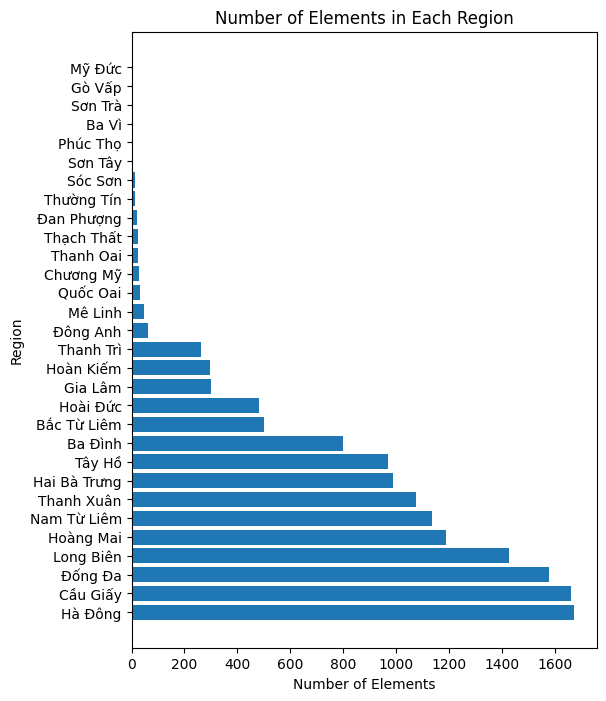

In [4]:
# Count the number of elements in each region
region_counts = data['district'].value_counts()
plt.figure(figsize=(6, 8))

# Plot the bar chart
plt.barh(region_counts.index, region_counts.values)
plt.xlabel('Number of Elements')
plt.ylabel('Region')
plt.title('Number of Elements in Each Region')
plt.show()

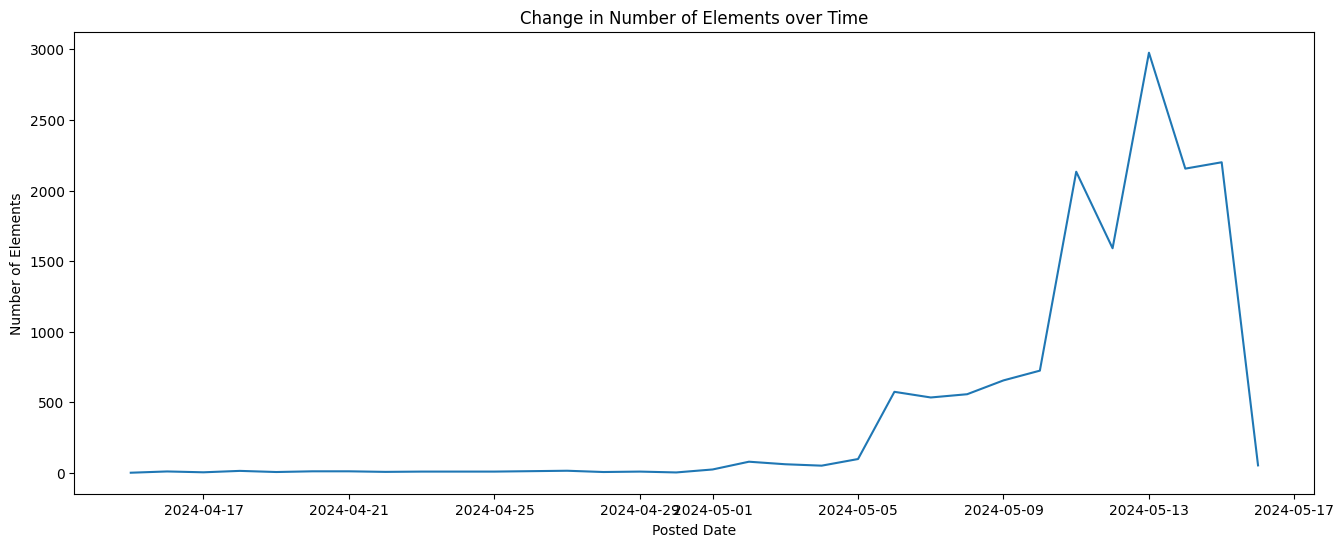

In [5]:
# Convert the posted_date column to datetime
data['posted_date'] = pd.to_datetime(data['posted_date'])

# Group the data by posted_date and count the number of elements
elements_by_date = data.groupby('posted_date').size()
plt.figure(figsize=(16, 6))

# Plot the line chart
plt.plot(elements_by_date.index, elements_by_date.values)
plt.xlabel('Posted Date')
plt.ylabel('Number of Elements')
plt.title('Change in Number of Elements over Time')
plt.show()

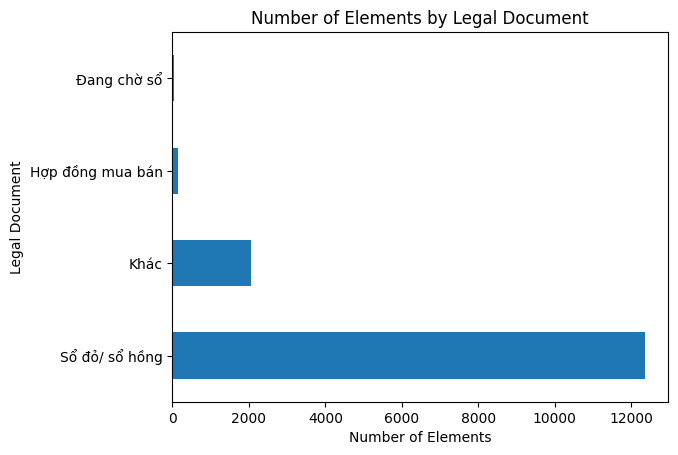

In [6]:
data['legal_document'].value_counts().plot(kind='barh')
plt.xlabel('Number of Elements')
plt.ylabel('Legal Document')
plt.title('Number of Elements by Legal Document')
plt.show()

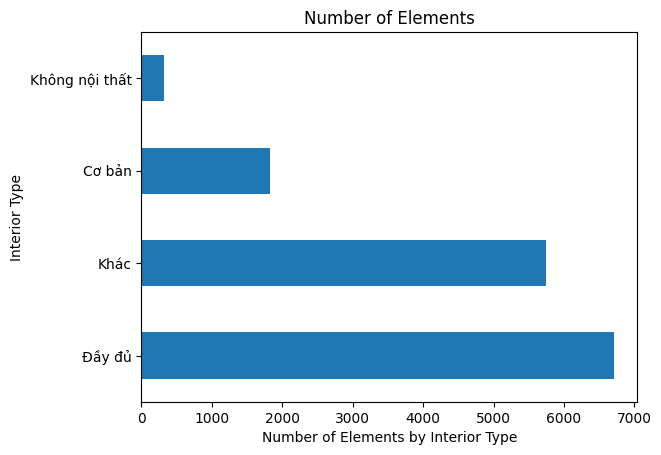

In [7]:
data['interior'].value_counts().plot(kind='barh')
plt.xlabel('Number of Elements by Interior Type')
plt.ylabel('Interior Type')
plt.title('Number of Elements')
plt.show()

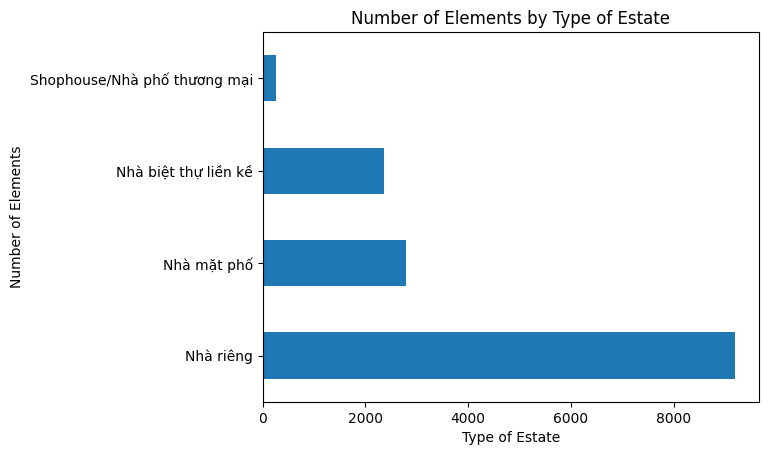

In [8]:
data['type_estate'].value_counts().plot(kind='barh')
plt.xlabel('Type of Estate')
plt.ylabel('Number of Elements')
plt.title('Number of Elements by Type of Estate')
plt.show()

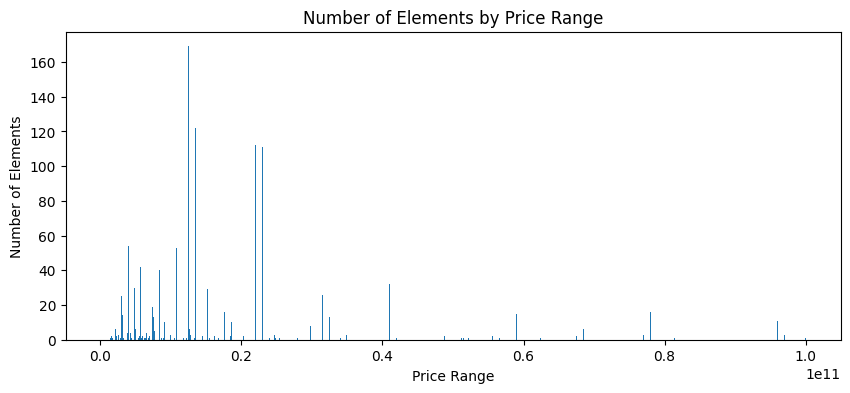

In [9]:
import matplotlib.pyplot as plt
filtered_data = data[data['price'] < 100000000000] # to make drawing easier to see
# Define the number of bins
num_bins = 10000
plt.figure(figsize=(10, 4))
# Plot the histogram
plt.hist(filtered_data['price'], bins=num_bins)
plt.xlabel('Price Range')
plt.ylabel('Number of Elements')
plt.title('Number of Elements by Price Range')
plt.show()

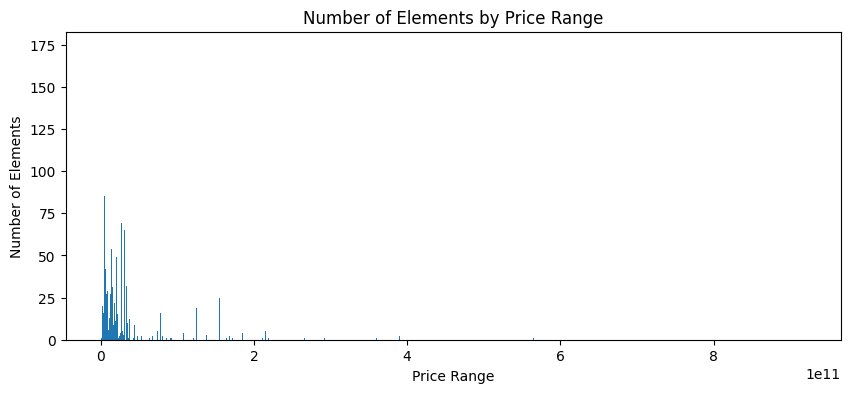

In [10]:
import matplotlib.pyplot as plt
# Define the number of bins
num_bins = 10000
plt.figure(figsize=(10, 4))
# Plot the histogram
plt.hist(data['price'], bins=num_bins)
plt.xlabel('Price Range')
plt.ylabel('Number of Elements')
plt.title('Number of Elements by Price Range')
plt.show()

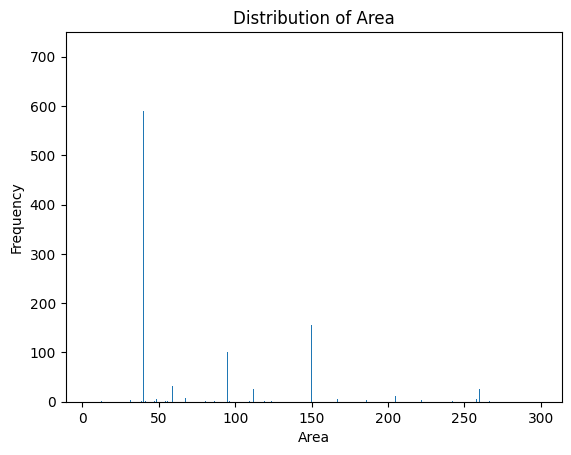

In [11]:
import matplotlib.pyplot as plt
new_data = data[data['area'] < 300] # to make drawing easier to see
# Define the number of bins
num_bins = 10000

# Plot the histogram
plt.hist(new_data['area'], bins=num_bins)

# Set the labels and title
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Distribution of Area')

# Show the plot
plt.show()

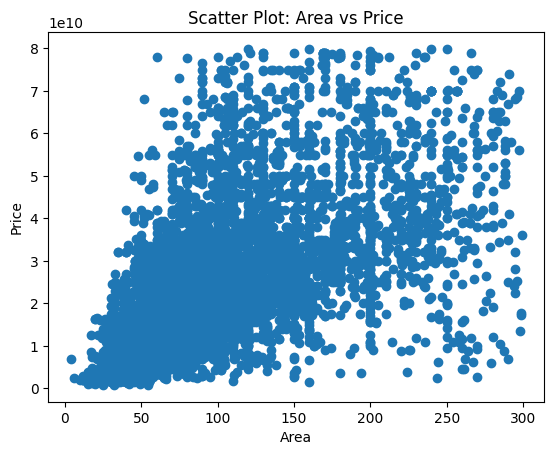

In [12]:
import matplotlib.pyplot as plt
new_data = data[data['area'] < 300] # to make drawing easier to see
new1_data = new_data[new_data['price'] < 80000000000] # to make drawing easier to see
plt.scatter(new1_data['area'], new1_data['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot: Area vs Price')
plt.show()

In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


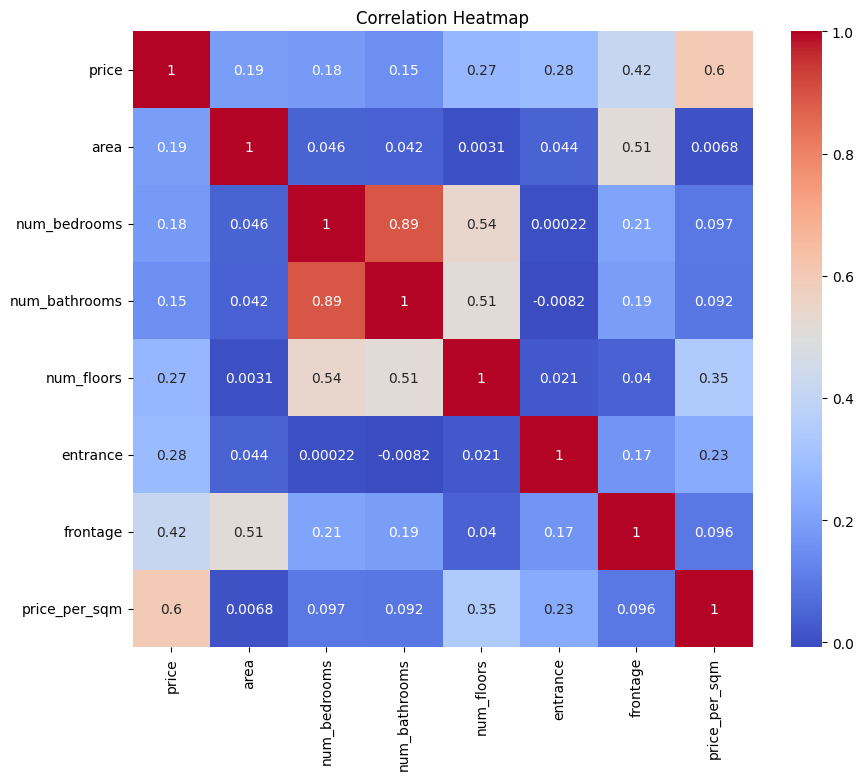

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation analysis
columns = ['price','area', 'num_bedrooms', 'num_bathrooms', 'num_floors', 'entrance', 'frontage', 'price_per_sqm']

# Calculate the correlation matrix
correlation_matrix = data[columns].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()